# E-Commerce Sales Data Analysis (Electronics Store)

## Objective
The goal of this project is to analyze an e-commerce electronics store dataset to:
- Clean and preprocess raw transactional data
- Analyze revenue trends over time
- Identify top-performing categories and brands
- Extract actionable business insights using Python


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading
The dataset is loaded using pandas. Initial inspection is performed to understand the structure.


In [2]:
df=pd.read_csv("kz.csv")

## Data Overview
This section examines data types, missing values, and basic statistics.


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


## Feature Engineering
New time-based features were created to support trend analysis.


In [4]:
df['event_time']=pd.to_datetime(df['event_time'])
df['event_time'].dtype

datetime64[ns, UTC]

In [5]:
df['Month']=df['event_time'].dt.month
df['Day']=df['event_time'].dt.day
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 10 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   order_id       int64              
 2   product_id     int64              
 3   category_id    float64            
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        float64            
 8   Month          int32              
 9   Day            int32              
dtypes: datetime64[ns, UTC](1), float64(3), int32(2), int64(2), object(2)
memory usage: 180.8+ MB


## Data Cleaning
Missing values were handled and invalid prices were removed to ensure data quality.


In [6]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
Month                  0
Day                    0
dtype: int64

In [7]:
df.drop(columns=['category_id'],inplace=True)

In [8]:
df['category_code'].fillna('unknown')

0                   electronics.tablet
1                   electronics.tablet
2          electronics.audio.headphone
3          electronics.audio.headphone
4                              unknown
                      ...             
2633516         electronics.smartphone
2633517         electronics.smartphone
2633518     appliances.personal.scales
2633519                        unknown
2633520     appliances.kitchen.blender
Name: category_code, Length: 2633521, dtype: object

In [9]:
df['brand'].fillna('unknown')

0           samsung
1           samsung
2            huawei
3            huawei
4           karcher
             ...   
2633516        oppo
2633517       apple
2633518       vitek
2633519    moulinex
2633520     redmond
Name: brand, Length: 2633521, dtype: object

In [10]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_code     612202
brand             506005
price             431954
user_id          2069352
Month                  0
Day                    0
dtype: int64

In [11]:
df=df.dropna(subset=['price'])

In [12]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_code     612202
brand             112670
price                  0
user_id          1637398
Month                  0
Day                    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(674)

In [14]:
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.dtypes

event_time       datetime64[ns, UTC]
order_id                       int64
product_id                     int64
category_code                 object
brand                         object
price                        float64
user_id                      float64
Month                          int32
Day                            int32
dtype: object

In [17]:
df[df['price']==0]

,event_time,order_id,product_id,category_code,brand,price,user_id,Month,Day
18627,2020-05-30 17:43:08+00:00,2320629268352074163,1515966223511884086,furniture.kitchen.chair,NaN,0.0,1.515916e+18,5,30
19721,2020-06-03 03:49:26+00:00,2323108762694451619,1515966223509132095,computers.notebook,hp,0.0,1.515916e+18,6,3
21563,2020-06-08 03:19:27+00:00,2326717549162529217,1515966223510616598,furniture.kitchen.chair,NaN,0.0,1.515916e+18,6,8
23043,2020-06-11 18:09:07+00:00,2329339661517848797,1515966223510616598,furniture.kitchen.chair,NaN,0.0,1.515916e+18,6,11
25682,2020-06-18 20:20:59+00:00,2334479458183938773,1515966223509336551,furniture.kitchen.chair,NaN,0.0,1.515916e+18,6,18
...,...,...,...,...,...,...,...,...,...
2521488,2020-10-22 15:12:34+00:00,2388440981134627558,2309018260114244280,NaN,barkan,0.0,1.515916e+18,10,22
2523556,2020-10-22 08:26:45+00:00,2388440981134628677,2309018259719979217,NaN,xiaomi,0.0,1.515916e+18,10,22
2558379,2020-11-01 10:32:06+00:00,2388440981134649580,2309018260114244281,NaN,barkan,0.0,1.515916e+18,11,1
2581690,2020-11-07 06:42:18+00:00,2388440981134663702,2309018260114244281,NaN,barkan,0.0,1.515916e+18,11,7


In [18]:
df=df[df['price']>0]

In [19]:
df[df['price']==0]

,event_time,order_id,product_id,category_code,brand,price,user_id,Month,Day


In [20]:
df['event_time'].value_counts()

event_time
1970-01-01 00:33:40+00:00    15551
2020-04-09 16:30:01+00:00      347
2020-04-08 16:30:01+00:00      340
2020-04-25 12:00:00+00:00      291
2020-04-06 16:30:01+00:00      288
                             ...  
2020-05-27 10:45:45+00:00        1
2020-05-27 06:35:32+00:00        1
2020-05-27 09:43:13+00:00        1
2020-05-27 05:50:23+00:00        1
2020-06-14 12:07:58+00:00        1
Name: count, Length: 1299867, dtype: int64

In [21]:
df[df['event_time'].dt.year==1970].shape

(15551, 9)

In [22]:
df=df[df['event_time'].dt.year!=1970]

In [23]:
df['event_time'].value_counts()

event_time
2020-04-09 16:30:01+00:00    347
2020-04-08 16:30:01+00:00    340
2020-04-25 12:00:00+00:00    291
2020-04-06 16:30:01+00:00    288
2020-04-05 16:30:01+00:00    222
                            ... 
2020-05-27 10:45:45+00:00      1
2020-05-27 06:35:32+00:00      1
2020-05-27 09:43:13+00:00      1
2020-05-27 05:50:23+00:00      1
2020-06-14 13:42:20+00:00      1
Name: count, Length: 1299866, dtype: int64

In [24]:
dr=(df.resample('D',on='event_time')['price'].sum())



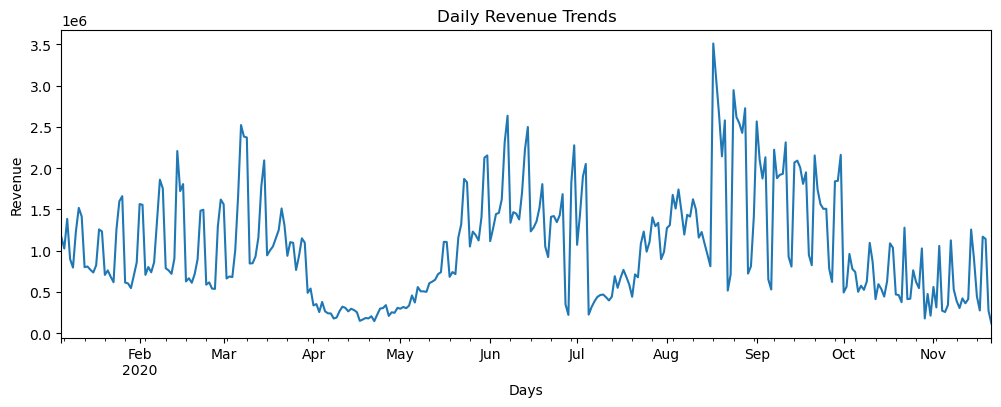

In [25]:
dr.plot(figsize=(12,4),title="Daily Revenue Trends")
plt.xlabel('Days')
plt.ylabel('Revenue')
plt.show()

In [26]:
top_cat = (df.groupby('category_code')['price'].sum())

In [27]:
top_cat = top_cat.sort_values(ascending = False).head(10)

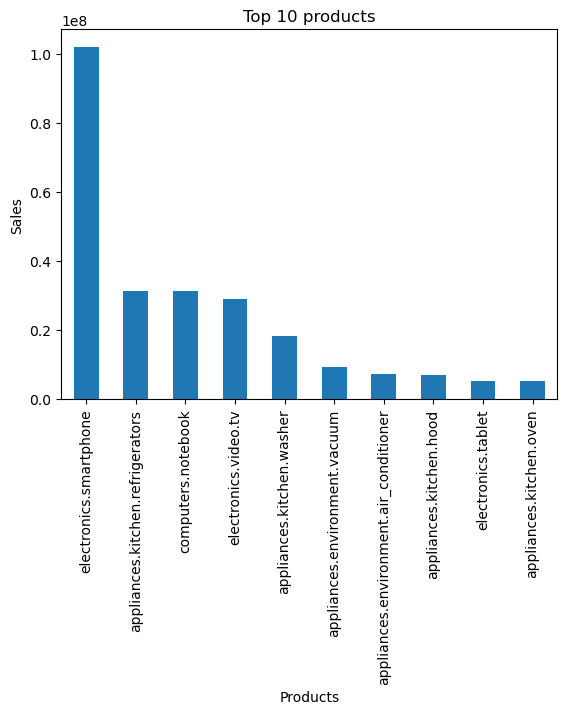

In [28]:
top_cat.plot(kind='bar',title='Top 10 products')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.show()

In [29]:
top_brand = (df.groupby('brand')['price'].sum())

In [30]:
top_brand = top_brand.sort_values(ascending = False)

In [31]:
top_brand = top_brand.head(10)
top_brand

brand
samsung    89530122.01
apple      47508355.08
lg         25988163.20
bosch      11024921.88
huawei     10642680.51
asus       10606186.69
lenovo     10493659.79
ava         8495886.71
beko        8441977.75
oppo        7257887.72
Name: price, dtype: float64

<Axes: title={'center': 'Top 10 Brands by Revenue '}, xlabel='brand'>

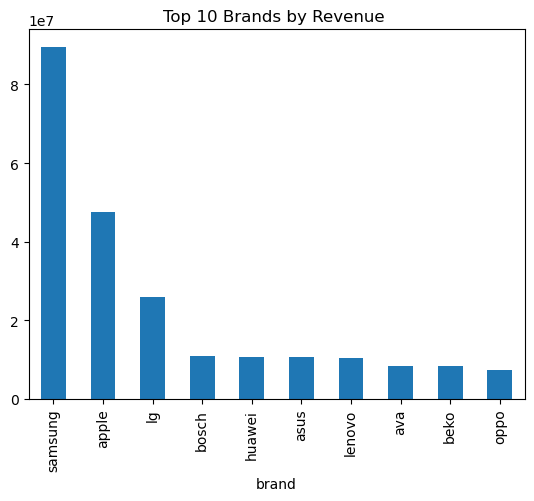

In [32]:
top_brand.plot(kind='bar',title='Top 10 Brands by Revenue ')

In [33]:
monthly_revenue = df.resample('ME',on='event_time')['price'].sum()

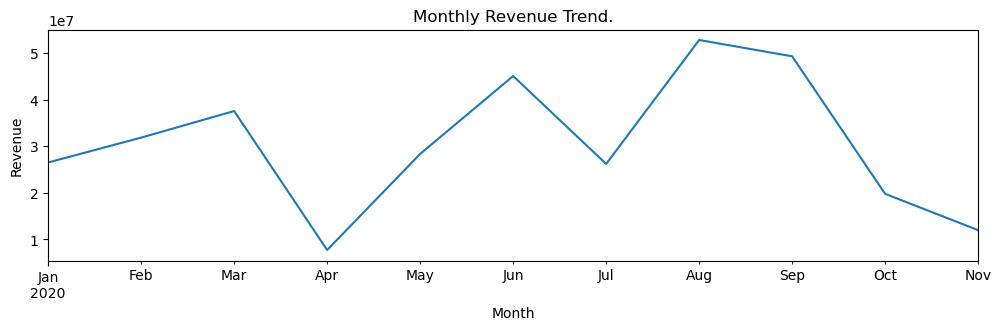

In [34]:
monthly_revenue.plot(figsize=(12,3),title='Monthly Revenue Trend.')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [35]:

pd.set_option('display.float_format', '{:,.0f}'.format)


## Key Business Insights
- Smartphones contribute the highest revenue among all categories
- A small number of brands generate a significant portion of total sales
- Revenue shows clear time-based patterns
- Data cleaning significantly improves analysis reliability
